# Locating Cities from Satellite images using Python

We have been given 4 images that are 64 by 64 pixels in size.Each pixel can either be white(a value of 255 on grayscale) or black(a value of 0 on grayscale).A black pixel means the area represented by that pixel is empty and a white pixel means that there are some settlements.A group of these white pixels that are close enough to each other basically mean that that region is a city.We shall find these cities and number of these cities using the K-Means algorithm.

Let us first start with one image which is named 1,a png file. First,we shall convert the image into an array so that it is easier to work with.

In [1]:
from PIL import Image
import numpy as np
img = Image.open(r'C:\Users\A.MANIDEEP REDDY\Downloads\1.png')
pixels = list(img.getdata())
width, height = img.size
img_array = np.array(pixels).reshape((height, width,-1))  
print(img_array)
print(img_array.shape)

[[[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 ...

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]]
(64, 64, 4)


The img_array is a 3 dimensional array.
In the img_array,there are 64*64 elements each being [0 0 0 255] or [255 255 255 255].Those that are carrying [0 0 0 255] are black pixels while [255 255 255 255] are white. The first 3 numbers (which are equal) basically represent the grayscale value of the pixel.Since only one of these 4 numbers is of the use for us now in this question,we shall eliminate the other 3 numbers and make a 2 dimensionsal array which is easier to work with.

In [2]:
array1=np.zeros((64,64))
for i in range(64):
    for j in range(64):
      array1[(i,j)]=img_array[i,j,0]

Now we have an 2 dimensional array that represents a 64 by 64 pixels image.This array can also be  converted into an excel file (which is not of any use besides giving a numerical view of an image) with the following lines of code.

In [3]:
import pandas as pd
df=pd.DataFrame(array1)
df.to_excel(r"C:\Users\A.MANIDEEP REDDY\Desktop\KDAG TASK\Pixels.xlsx", index=False)

## K-means algorithm and Elbow method

The k-means algorithm assumes that there are k clusters (k must be given) in given data points and gives the best cluster groups and their centres by iterative process.
First we assume k random points as cluster positions and each of the data points are assigned to those clusters that are the nearest to them. Now the cluster position of each cluster is changed to the mean position of the points in that cluster and now with these cluster position cluster groups are re-assigned in the same way. This process is continued till convergence.

But some data sets can be such that one cannot determine the number of clusters by visual means,that is dividing the data points into 2 clusters and 3 clusters both make sense.
In these cases,we use elbow method to determine the optimal value of k.In this method,we find within-cluster sum of squares (WCSS),which the sum of squares of the distances between each data point and the cluster position of the cluster to which the point is assigned,for multiple values of k and plot a graph of WCSS vs k. From the graph we find the elbow point,which is the point where the slope changes abruptly and the k value of this point is declared as the optimal value of k.

We shall use these two and locate cities in the given images.

Let us first find the data points (that is the white pixels)

In [4]:
def findlyts(array):
    lyts = []
    for i in range(64):
        for j in range(64):
            if array[i, j]!=0:
                lyts.append((i, j))
    return np.array(lyts)

lyts1=findlyts(array1)

The lyts now contains the coordinates of the pixels that are white.
Now we need to initialise the cluster positions.

In [5]:
import random
def initialclusterf(lyts,k):
    initialcluster=[]
    for i in range(k):
        s=random.randint(0,len(lyts)-1)
        initialcluster.append(lyts[s])
    return np.array(initialcluster)

This function returns an array named initialcluster that contains k cluster positions chosen at random from the lyts array.
To apply the k-means algorithm let us write 2 functions,one function which is recursive and the other function does the actual calculation part and updating the cluster positions with the mean point. This function shall also include the calculation of wcss. Let us first write the 2nd function.

In [6]:
def kmeans(lyts,initialcluster,k):
    wcss=0
    array_m=np.zeros((k,3))
    finalcluster=np.zeros((k,2))
    for i in range(len(lyts)):
      d=np.inf
      y=0
      for j in range(k):
        x=np.linalg.norm(lyts[i]-initialcluster[j])
        if x<d:
           d=x
           y=j
      array_m[y]=array_m[y]+np.array((lyts[i,0],lyts[i,1],1))
      wcss=wcss+d*d
    for t in range(k):
      if array_m[(t, 2)] != 0:
        finalcluster[(t, 0)] = array_m[(t, 0)] / array_m[(t, 2)]
        finalcluster[(t, 1)] = array_m[(t, 1)] / array_m[(t, 2)]
      else:
        finalcluster[(t, 0)] = 0
        finalcluster[(t, 1)] = 0
    return [finalcluster,wcss]

Here,the outer for loop is iterating over each data point and the inner loop is iterating over each cluster position to find the nearest cluster position to the given point (given by the outer loop). The array named array_m is a k by 3 array. This serves a purpose. It has k rows so as store information regarding k cluster points. Also it has 3 columns. The first column of jth row holds the value of sum of x-coordinates of the points which are assigned to the jth cluster,second column holds the value of sum of y-coordinates and third column holds the number of points in jth cluster. So when 1st and 2nd column values are divided by 3rd column values,we get the mean of the points in that cluster. This is how we are updating the finalcluster array. At the end of an inner loop,y is assigned with the index of the cluster position in initialcluster array that is closest to the point,d is assigned with the distance between these two,array_m and wcss are updated. At the end of the outer loop,we shall update finalcluster array.
The function returns the finalcluster array as well as wcss value for that particular initialisation.

Now for the recursive function,

In [7]:
def mainalgo(lyts,initialcluster,k):
    finalcluster=kmeans(lyts,initialcluster,k)
    if np.array_equal(finalcluster[0],initialcluster):
       return finalcluster
    else:
       return mainalgo(lyts,finalcluster[0],k)

This function takes intialcluster array and k value and then undergoes recursion until convergence is reached and then returns the finalcluster list which contains the wcss value and an array containing the final cluster positions.
Now to find optimal k value by applying the elbow method,

In [8]:
import matplotlib.pyplot as plt
def elbow_k(lyts):
    wcss_lists=[]
    for k_1 in range(10):
       k=k_1+1
       finalcluster=mainalgo(lyts,initialclusterf(lyts,k),k)
       wcss_lists.append(finalcluster[1])
    plt.plot(wcss_lists)
    plt.xlabel('K-1')
    plt.ylabel('WCSS')
    plt.show()

This function plots wcss vs (k-1) from k=1 to k=10. Lets call it.

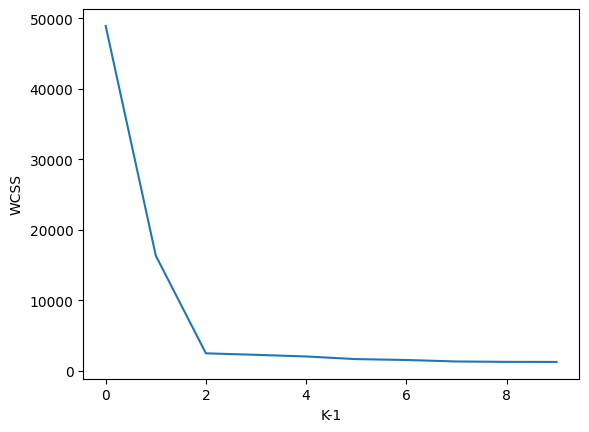

In [9]:
elbow_k(lyts1)

In the plot we observe an elbow point a k-1=2,that is at k=3.So we can say that are 3 cities in the image 1.png .
To find the city centres,we call mainalgo function with k=3.

In [10]:
c_w1=mainalgo(lyts1,initialclusterf(lyts1,3),3)
print(c_w1[0])

[[38.93023256 40.81395349]
 [33.43478261 16.45652174]
 [19.7        58.425     ]]


Now let us find distance between these centres.

In [11]:
def dist_cities(c_w):
  c_w_n=np.array(c_w[0])
  distances=[]
  for i in range(c_w_n.shape[0]):
      for j in range(i+1,c_w_n.shape[0]):
          distances.append((i+1,j+1,np.linalg.norm(c_w_n[i]-c_w_n[j])))
  dis_df=pd.DataFrame(distances,columns=["First City Number","Second City Number","Distance between the Cities"])
  print(dis_df.to_string(index=False))
dist_cities(c_w1)

 First City Number  Second City Number  Distance between the Cities
                 1                   2                    24.969671
                 1                   3                    26.075866
                 2                   3                    44.158775


We now have the distances between the cities in the 1st image.
Lets repeat this process for the remaining 3 images.

### Image 2.png

In [12]:
img = Image.open(r'C:\Users\A.MANIDEEP REDDY\Downloads\2.png')

pixels = list(img.getdata())

width, height = img.size

img_array = np.array(pixels).reshape((height, width,-1))  

array2=np.zeros((64,64))
for i in range(64):
    for j in range(64):
      array2[(i,j)]=img_array[i,j,0]
 
lyts2=findlyts(array2)

lyts2 has data points of image 2.png .

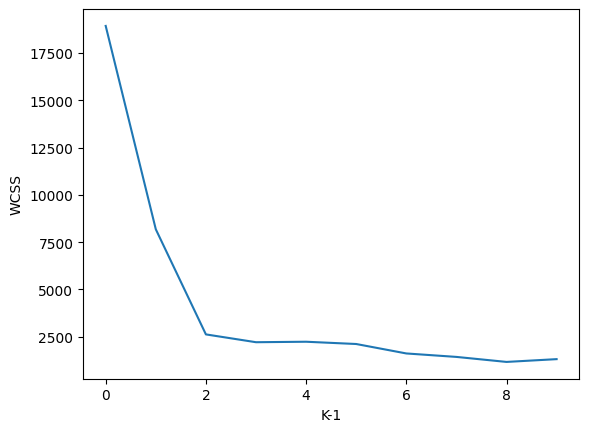

In [13]:
elbow_k(lyts2)

From the plot we can say k=3.So,the city centres are

In [14]:
c_w2=mainalgo(lyts2,initialclusterf(lyts2,3),3)
print(c_w2[0])

[[48.62068966 23.10344828]
 [44.90909091 40.54545455]
 [26.38461538 28.82051282]]


And the distances between them are

In [15]:
dist_cities(c_w2)

 First City Number  Second City Number  Distance between the Cities
                 1                   2                    17.832542
                 1                   3                    22.959264
                 2                   3                    21.923286


### Image 3.png

In [16]:
img = Image.open(r'C:\Users\A.MANIDEEP REDDY\Downloads\3.png')

pixels = list(img.getdata())

width, height = img.size

img_array = np.array(pixels).reshape((height, width,-1))  

array3=np.zeros((64,64))
for i in range(64):
    for j in range(64):
      array3[(i,j)]=img_array[i,j,0]

lyts3=findlyts(array3)

lyts3 has data points of image 3.png .

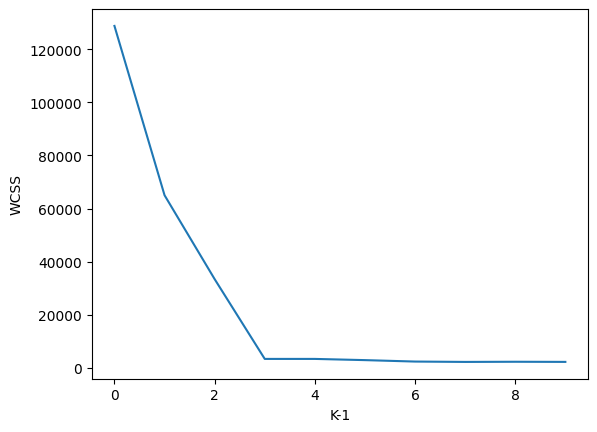

In [17]:
elbow_k(lyts3)

From the plot we can say k=4.So,the city centres are

In [18]:
c_w3=mainalgo(lyts3,initialclusterf(lyts3,4),4)
print(c_w3[0])

[[52.22222222 48.5       ]
 [ 9.62666667 27.74666667]
 [49.20930233  9.41860465]
 [46.95238095 51.33333333]]


And the distances between them are

In [19]:
dist_cities(c_w3)

 First City Number  Second City Number  Distance between the Cities
                 1                   2                    47.382298
                 1                   3                    39.197362
                 1                   4                     5.983227
                 2                   3                    43.619983
                 2                   4                    44.153593
                 3                   4                    41.975447


### Image 4.png

In [20]:
img = Image.open(r'C:\Users\A.MANIDEEP REDDY\Downloads\4.png')

pixels = list(img.getdata())

width, height = img.size

img_array = np.array(pixels).reshape((height, width,-1))  

array4=np.zeros((64,64))
for i in range(64):
    for j in range(64):
      array4[(i,j)]=img_array[i,j,0]
        
lyts4=findlyts(array4)

lyts4 has data points of image 4.png 

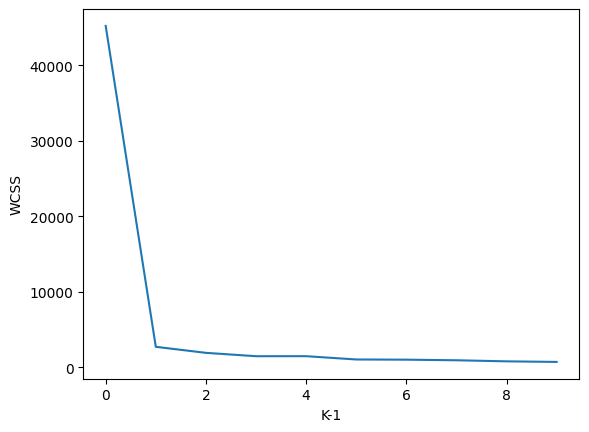

In [21]:
elbow_k(lyts4)

From the plot we can say k=2.So,the city centres are

In [22]:
c_w4=mainalgo(lyts4,initialclusterf(lyts4,2),2)
print(c_w4[0])

[[20.32911392 21.07594937]
 [38.44736842 57.5       ]]


And the distances between them are

In [23]:
dist_cities(c_w4)

 First City Number  Second City Number  Distance between the Cities
                 1                   2                    40.681477
